# Datasets statistics

This notebook contain the different plots to analyse the data produce in the different datasets.

## Imports and arguments

*   Add in the variable "tables" the different paths of the dataset you want to visualize.

In [1]:
from plot_methods import (
    datasets_stats,
    load_template,
    plot_events_length, 
    plot_unique_events,
    plot_time_diff, 
    plot_level_dist, 
    plot_embeddings,
    plot_execution_graph
)

In [2]:
path = "../results/db/"

tables = {
    "Normal v1": f"{path}/test_normal_v1.csv",
    "Abnormal v1": f"{path}/test_abnormal_v1.csv",
    "Normal v2": f"{path}/test_normal_v2.csv",
    "Abnormal v2": f"{path}/test_abnormal_v2.csv",
}

template_path = f"{path}/template.csv"

## General stats

### Different datasets

In [3]:
datasets_stats(tables)

,Name,Size
0,Normal v1,100
1,Abnormal v1,100
2,Normal v2,100
3,Abnormal v2,100


### Overall template

In [4]:
load_template(template_path)

,Template,Event ID
0,NaN,0
1,Process has<*>,1
2,Resource ready,2
3,Trying again later,3
4,Errors found<*>,4
5,Not abale to access:<*>,5
6,"Unable to connect, trying againg later",6
7,It may take a little to ajust,7
8,Not able to access:<*>,8
9,The process has<*>,9


## Event Statistics

Statistics that are obtain by analyzing the different id event sequences.

### Sequence length

The length distribution of the different event sequences.

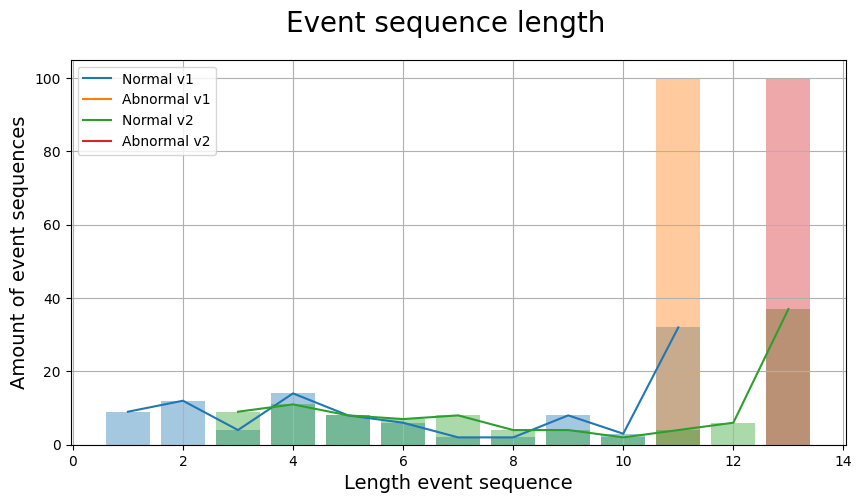

In [5]:
plot_events_length(tables)

### Evenet ID distribution

Event ID distribution of the different datasets

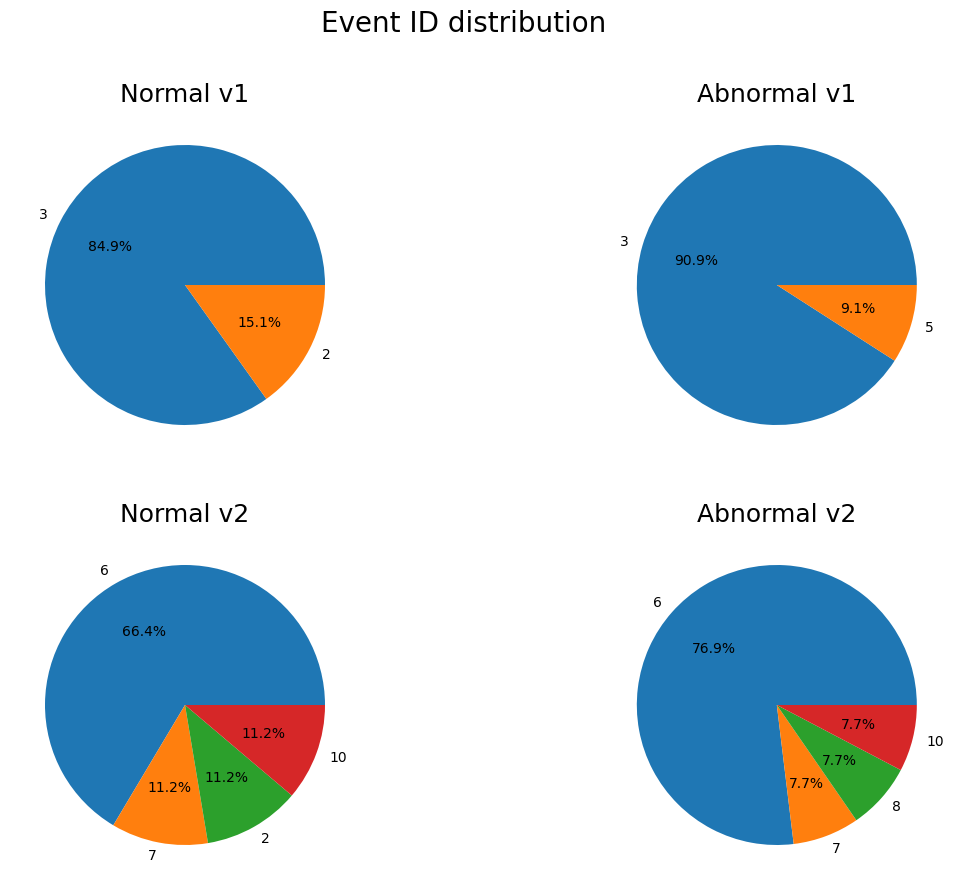

In [6]:
plot_unique_events(tables)

## Time Diff. Statistics

Time difference distribution between the first and the next event. In the plot we only show the first event.

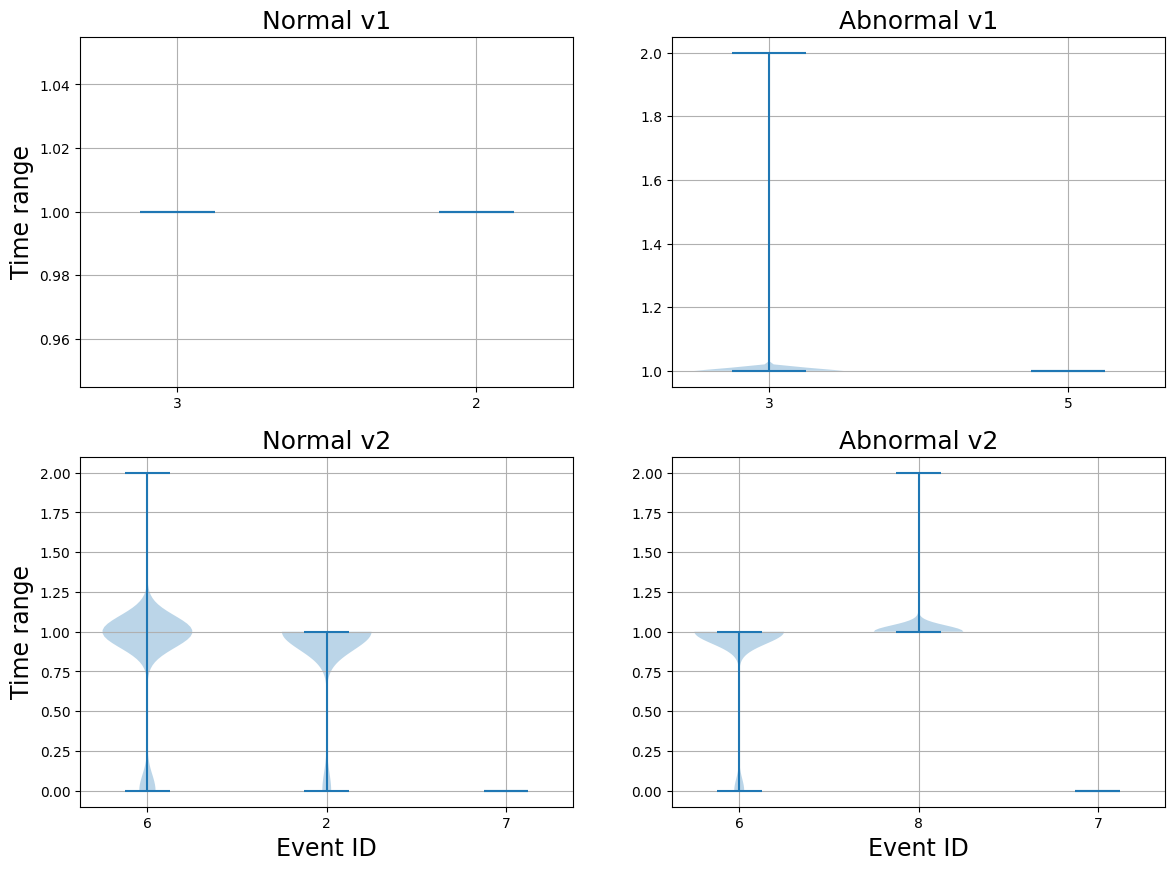

In [7]:
plot_time_diff(tables)

## Level log distribution

Pie plots of the log level distribution.

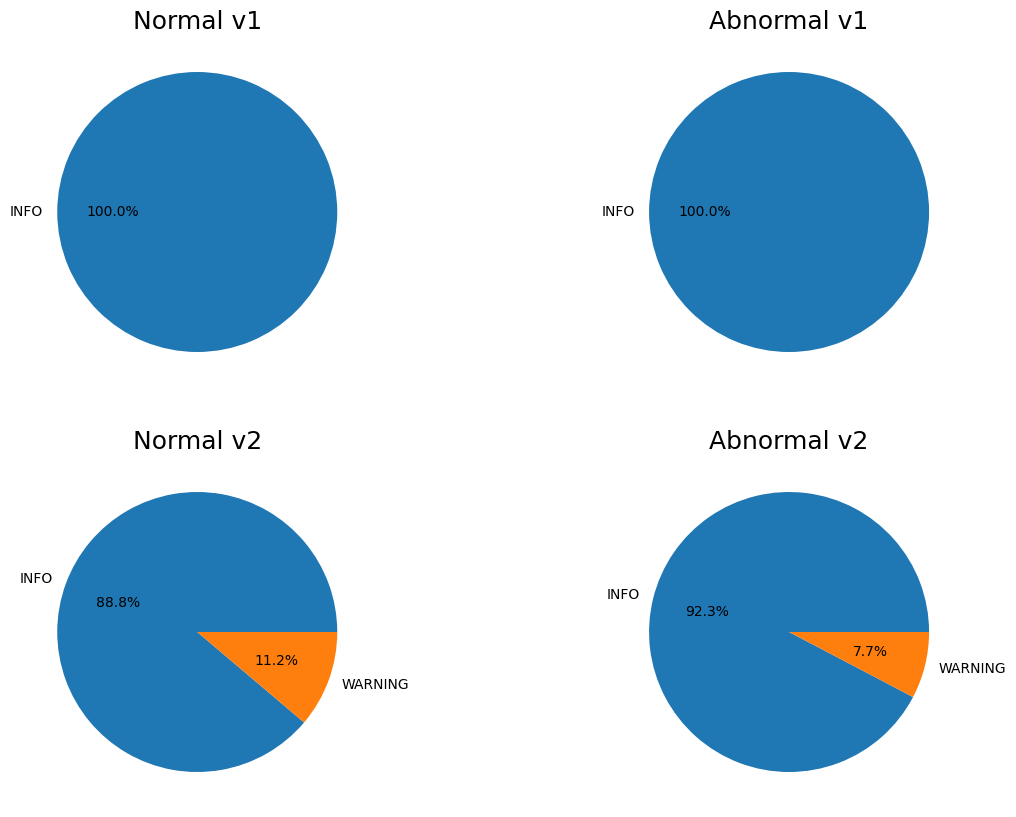

In [8]:
plot_level_dist(tables)

## Templates analysis

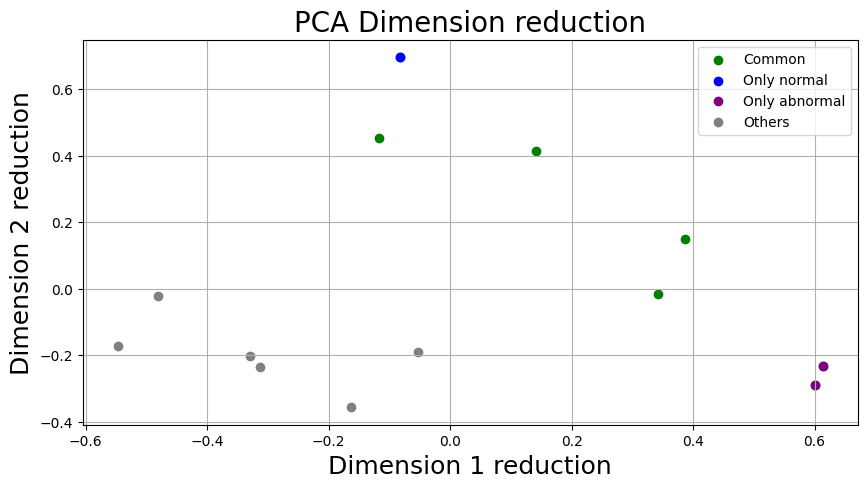

In [9]:
plot_embeddings(tables, "Template")

## Los message analysis

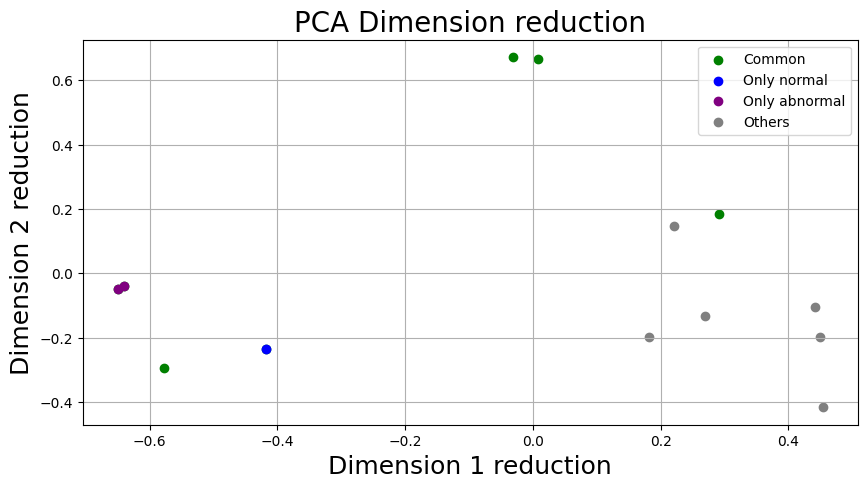

In [10]:
plot_embeddings(tables, "Content")

## Execution graph

Execution graphs of the code presented in graphs.

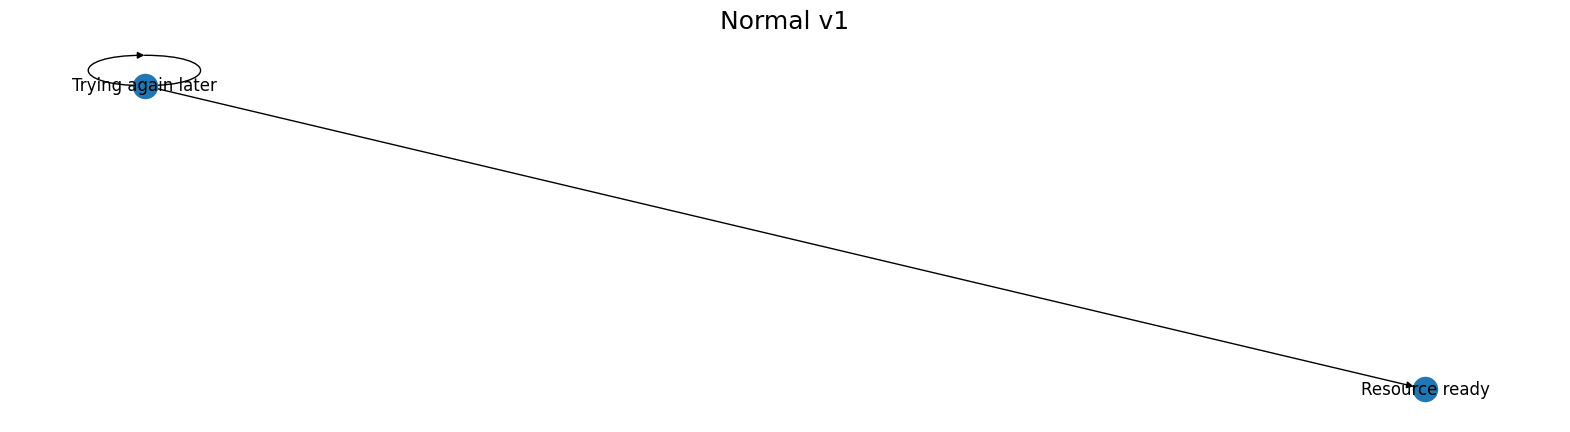

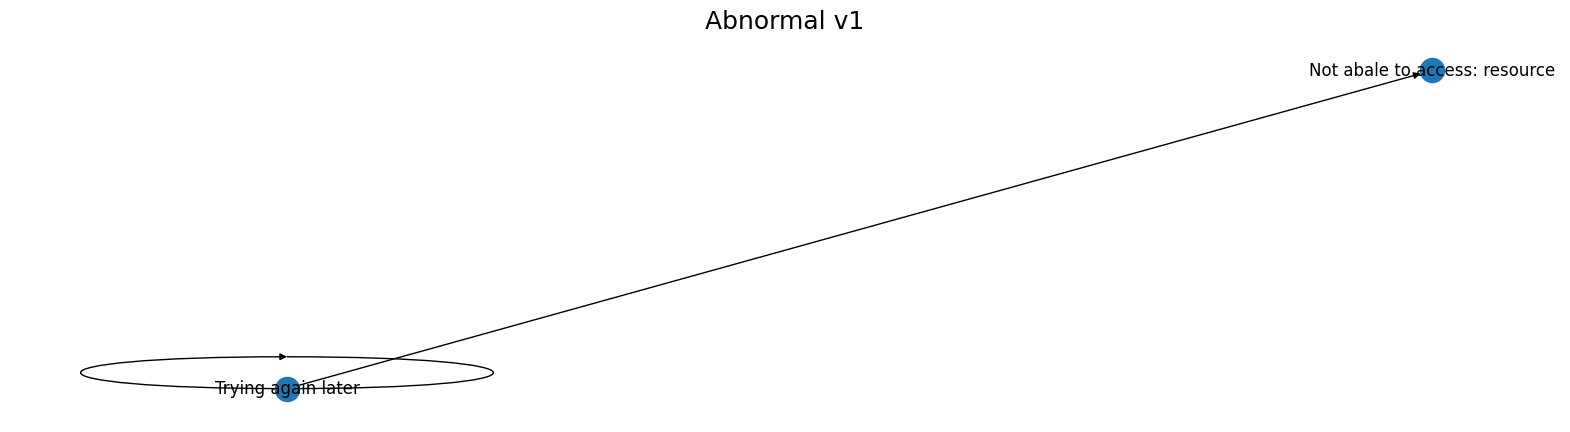

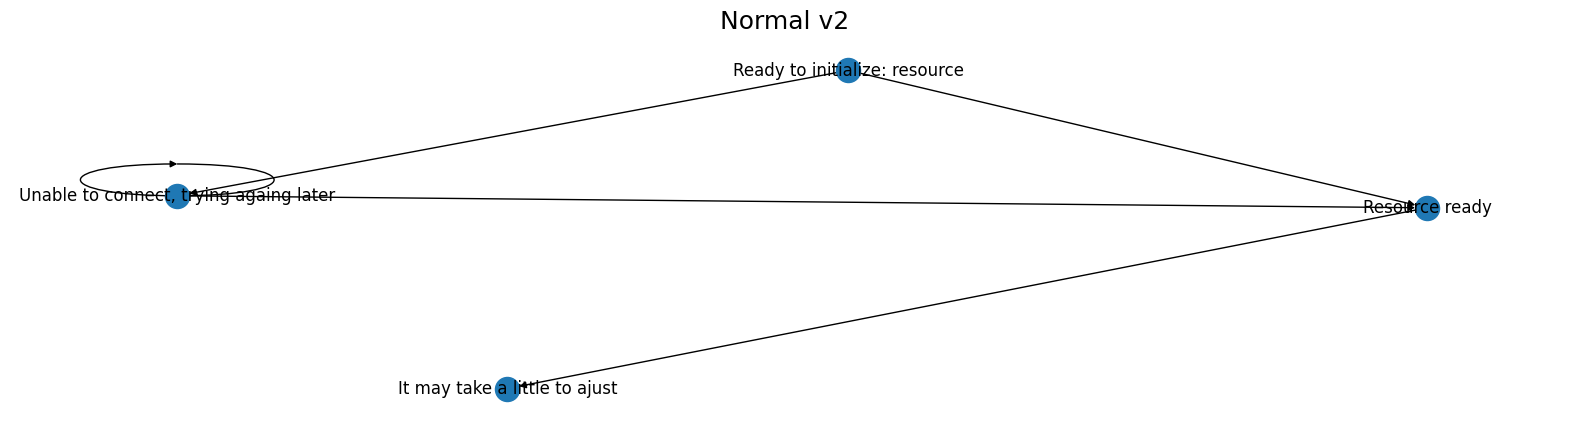

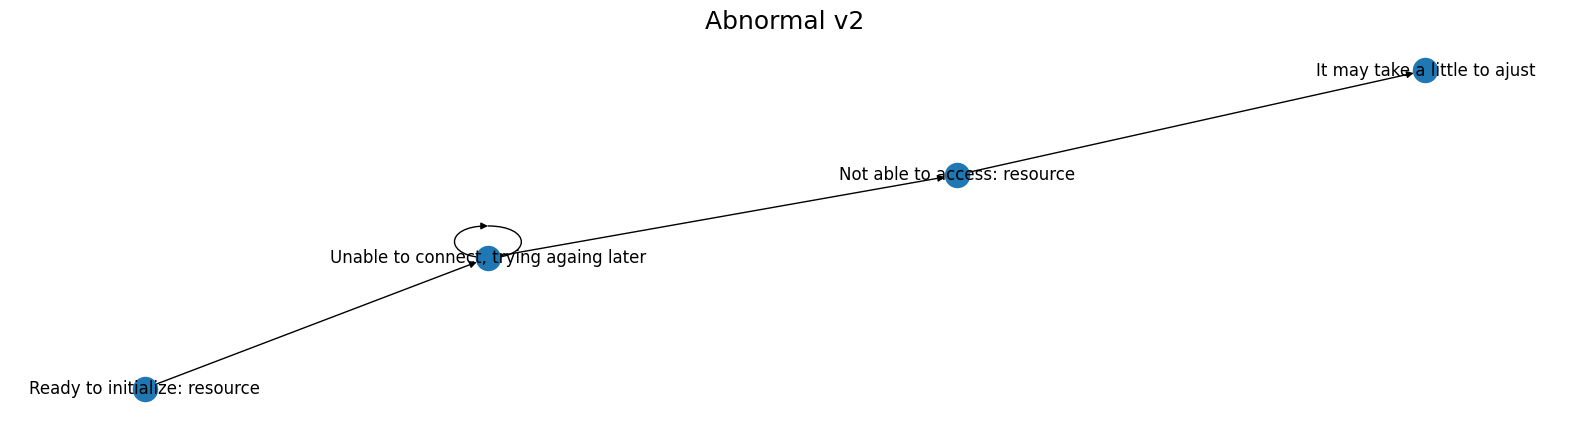

In [11]:
plot_execution_graph(tables)